- 결측치와 이상치
- 데이터 특성에 따른 수치변환, 특성 생성 할 수 있다.

<AxesSubplot: >

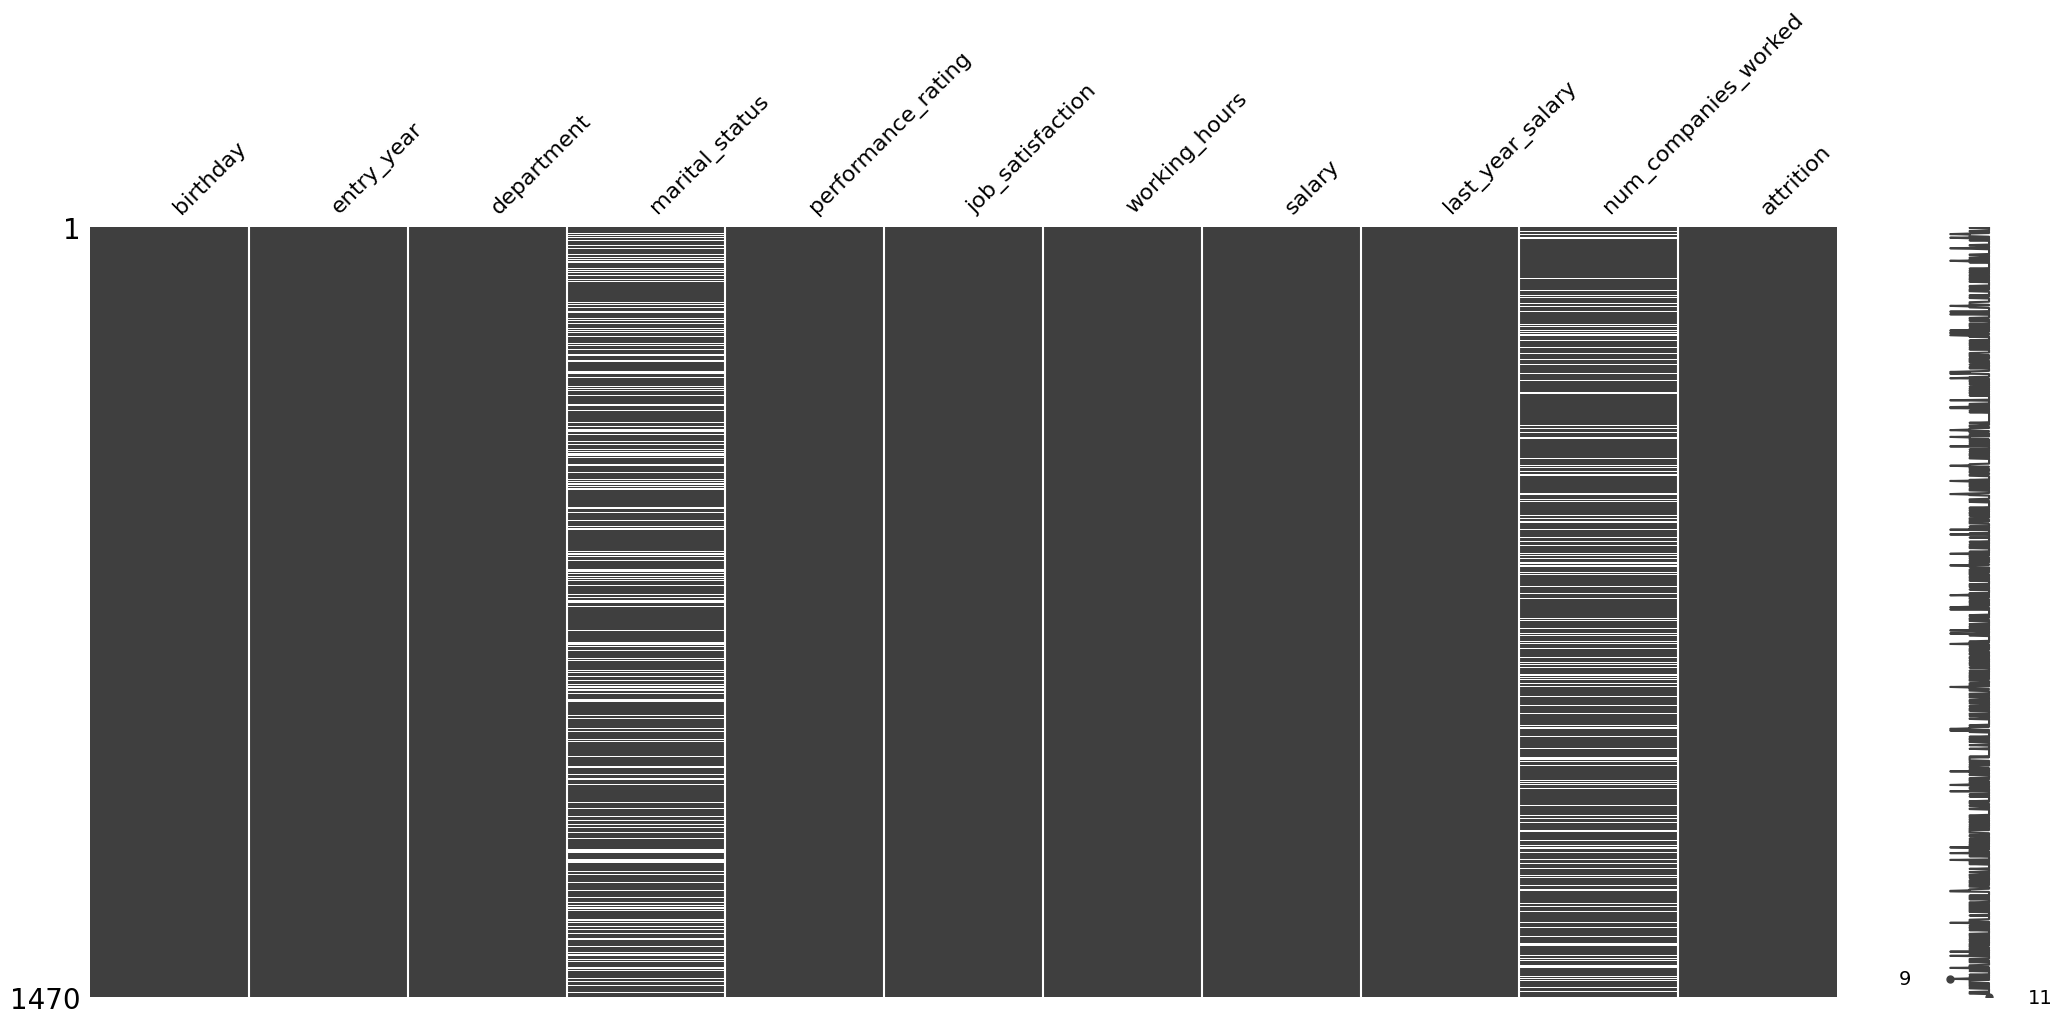

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno

df = pd.read_csv("../datas/titanic_datas/hr_data.csv", encoding="utf-8", index_col=0)
df.head(2)

df.shape

#결측치 노이즈 확인
msno.matrix(df)

In [3]:
df[df["marital_status"].isnull() | df["num_companies_worked"].isnull()].__len__()
df[df.isnull().any(axis=1)].__len__()

#union 함수

a = df[df["marital_status"].isnull()].index
b = df[df["num_companies_worked"].isnull()].index
a.union(b).__len__()

539

## Numerical

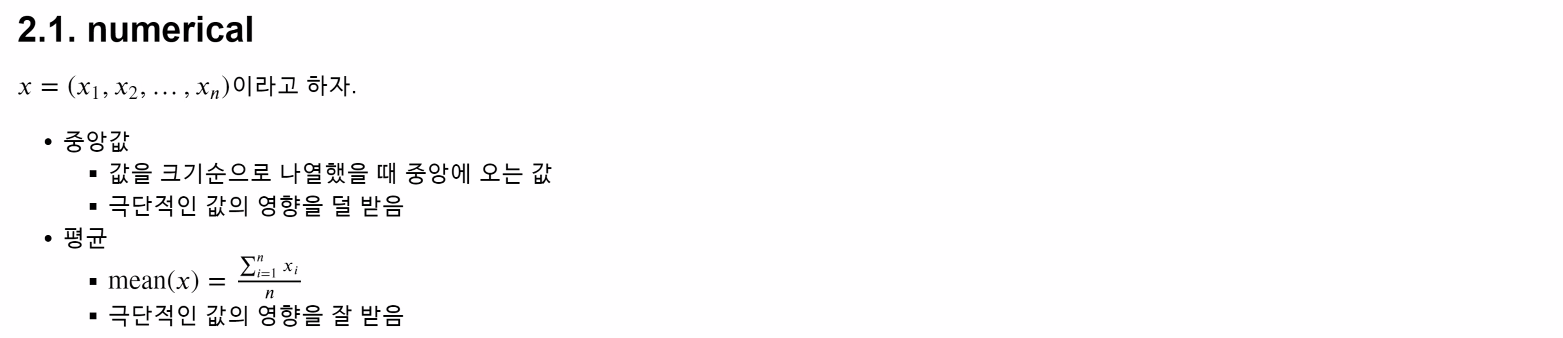

In [4]:
#num_companies_worked 의 중앙값과 평균을 찾아보자!
print("평__균:",df["num_companies_worked"].mean()) 
print("중앙값:",df["num_companies_worked"].median()) 

평__균: 2.7237386269644333
중앙값: 2.0


In [5]:
#numpy 로 계산하기 (위의 평균이나, 중앙값은 결측에 len 에빠지고 계산이 되는것이라!)
df["num_companies_worked"].sum()/len(df)

#np.nanmedian() # nan 을 제외하고 계산된다.
#np.nanmean() # nan 을 제외하고 계산된다.

2.2401360544217686

<AxesSubplot: >

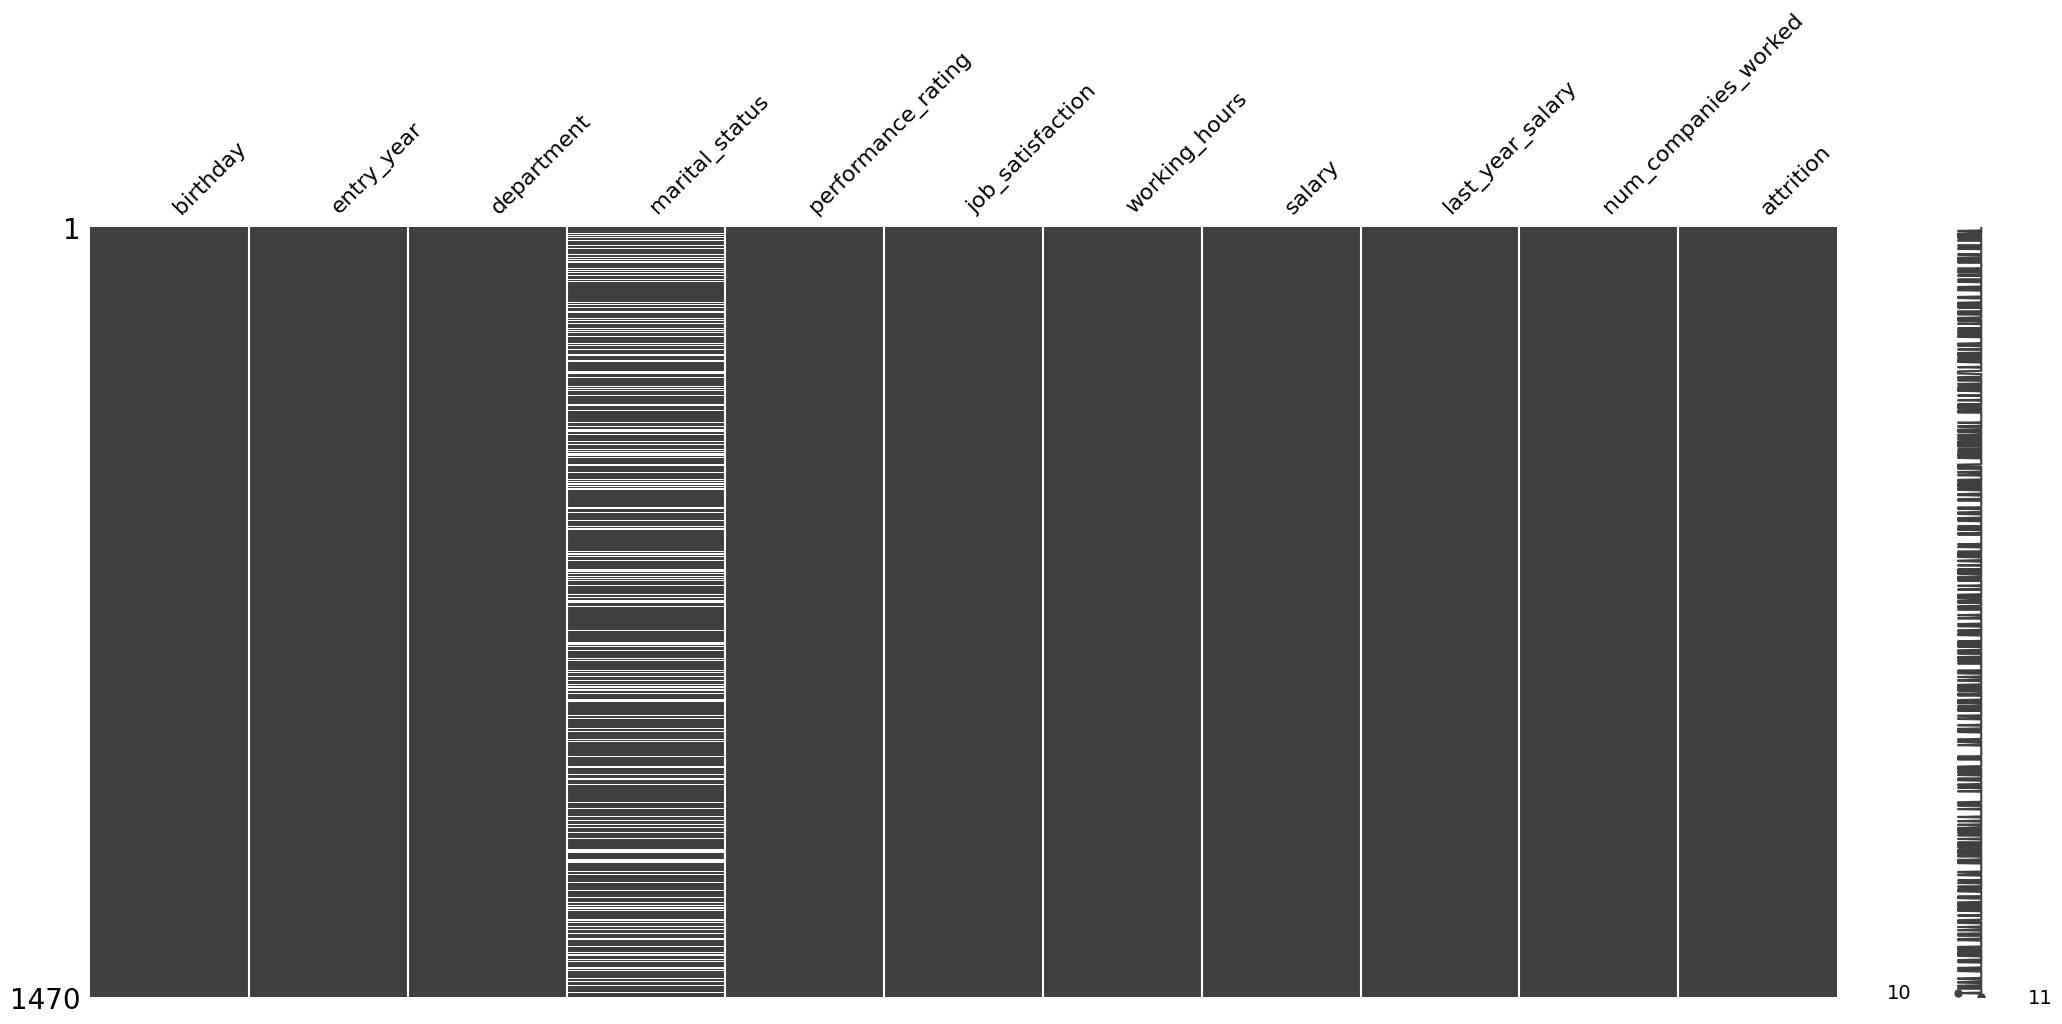

In [6]:
# 결측 채우기,
# 차이가 많이 날때는 분포를 보고 채워야한다.
# 쓰끼리다
# 일단 median 으로 채우자
df["num_companies_worked"] = df["num_companies_worked"].fillna(df["num_companies_worked"].median())

#결측치 노이즈 확인
msno.matrix(df)

## categorical datas
- ordinal
    - 순서를 줄 수 있는 구조
- norminal
    - 순서 없이 수평적 구조

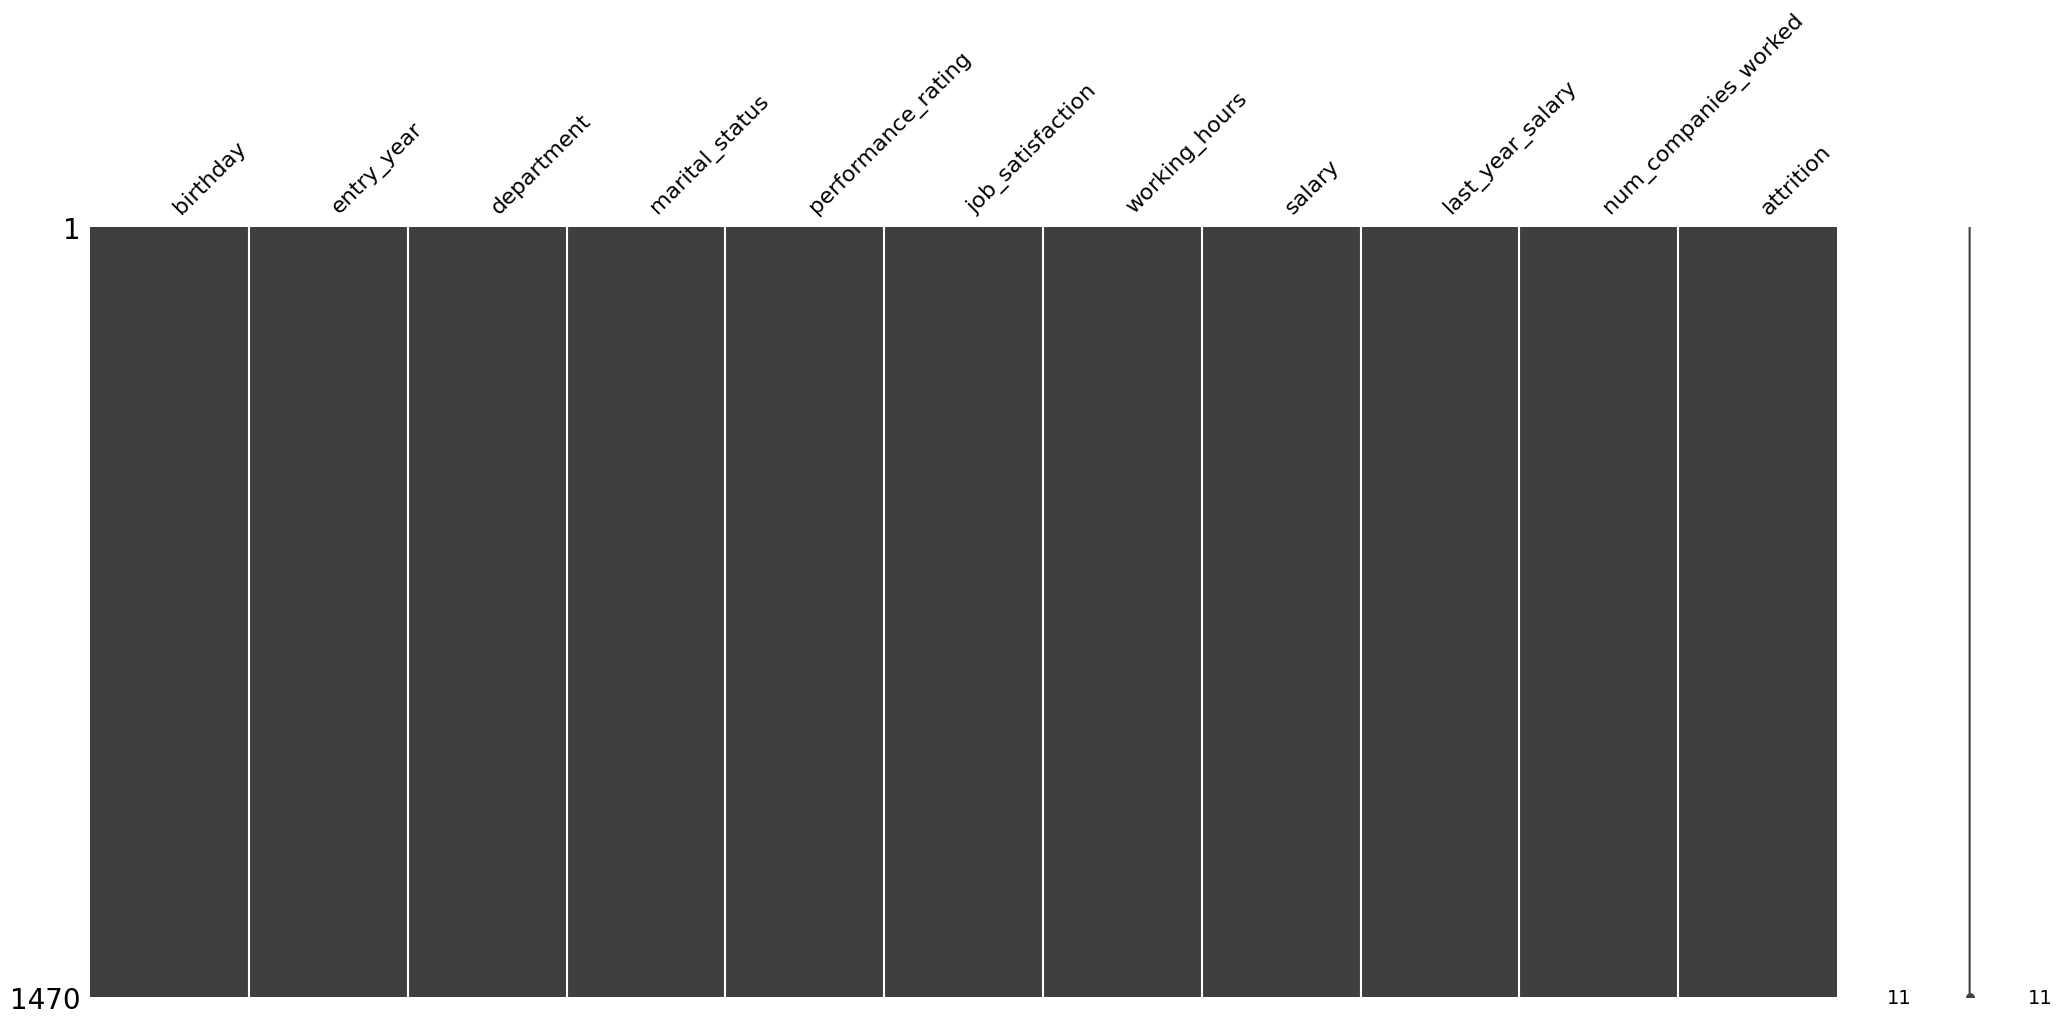

In [7]:
# norminal 구조이다. 결혼 여부
# 방법 1. nan값의 카테고리를 조건하에 기존의 카테고리를 넣는다.
# 방법 2. nan값의 카테고리를 새로 추가해 새로운 카테고리를 넣는다.
df["marital_status"].unique() # 'single', 'married', nan
df["marital_status"].fillna("etc", inplace=True) # 'single', 'married', nan
df["marital_status"].unique() # 'single', 'married', nan

#결측 노이즈 확인
msno.matrix(df);


## 이상치 해결하기


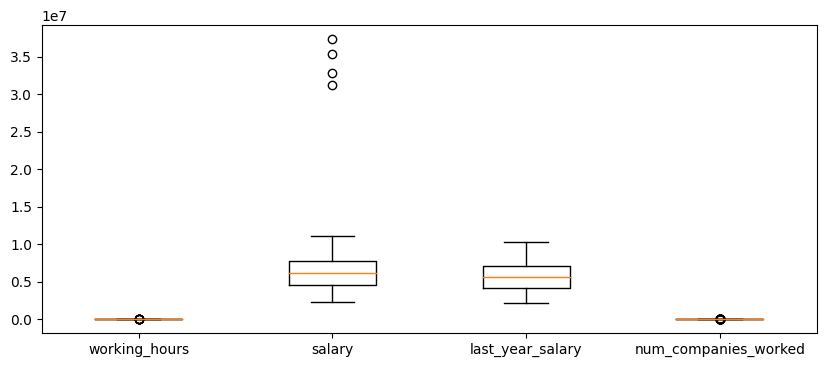

In [8]:
## "working_hours", "salary", "last_year_salary", "num_companies_worked" 의 박스플롯 그리기
## 아래처럼 그리면 안되고 따로 그려야 된다.
fig, ax = plt.subplots(figsize = (10, 4))

ax.boxplot([df["working_hours"],
            df["salary"],
            df["last_year_salary"],
            df["num_companies_worked"]])

ax.set_xticklabels(["working_hours",
                    "salary",
                    "last_year_salary",
                    "num_companies_worked"]);

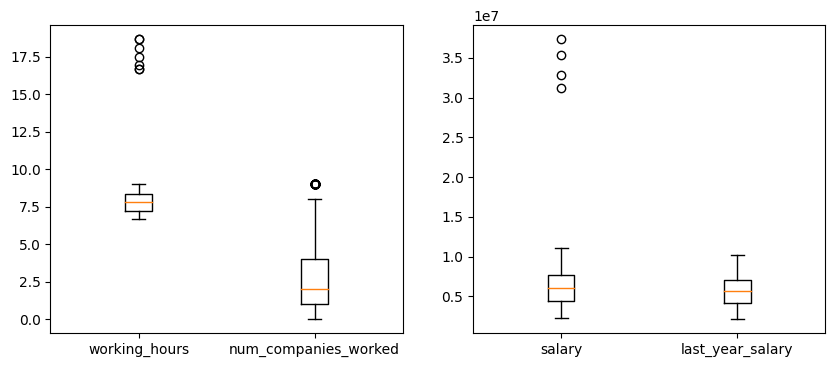

In [9]:
## "working_hours", "salary", "last_year_salary", "num_companies_worked" 의 박스플롯 그리기
## 아래처럼 그리면 안되고 따로 그려야 된다.
fig, (ax_1, ax_2) = plt.subplots(1,2 , figsize = (10, 4))

ax_1.boxplot([df["working_hours"],
            df["num_companies_worked"]])

ax_1.set_xticklabels(["working_hours",
                    "num_companies_worked"]);

ax_2.boxplot([df["salary"],
            df["last_year_salary"]])

ax_2.set_xticklabels(["salary",
                    "last_year_salary"]);

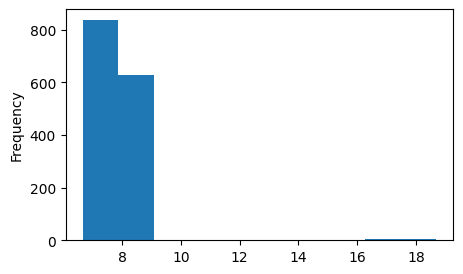

In [10]:
fig, ax = plt.subplots(figsize = (5, 3))

df["working_hours"].plot(kind="hist", ax = ax);

In [11]:
df.loc[df["salary"].sort_values(ascending=False).head(4).keys()]

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition
1204,1973-7-8,2002,sales,married,high,high,8.33,37349000,8830385,2.0,yes
642,1983-8-5,2018,sales,married,high,medium,7.50,35369100,8067033,2.0,no
1083,1981-12-8,2006,rnd,single,high,low,8.10,32841936,7641924,3.0,yes
1308,1983-8-19,2001,sales,married,very high,very high,8.33,31173000,7073840,2.0,no


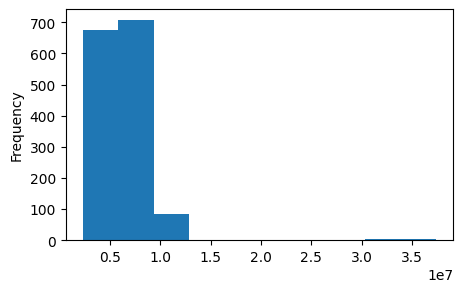

In [12]:
fig, ax = plt.subplots(figsize = (5, 3))

df["salary"].plot(kind="hist", ax = ax);

## IQR 이론

$ IQR = (Q_3 - Q_1) $   
$ \text{상한 값}:  Q_3 + 1.5 \times IQR $   
$ \text{하한 값}:  Q_1 - 1.5 \times IQR $   

In [13]:
xx = [42, 50, 38, 34, 28, 192]
np.sort(xx)

array([ 28,  34,  38,  42,  50, 192])

Q1  5.5
Q2 median 12.5
Q3  28.75


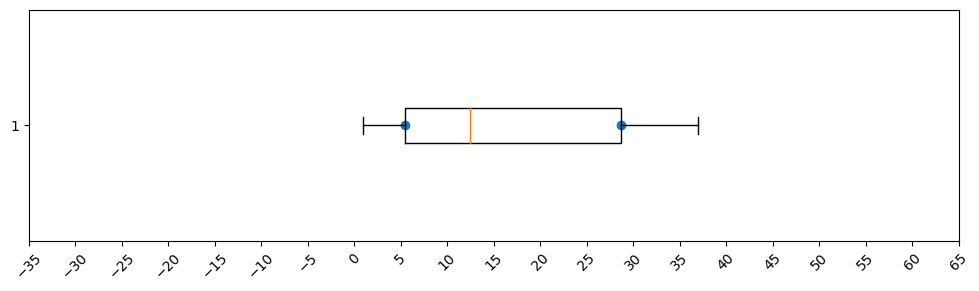

In [33]:
import matplotlib.pyplot as plt

x = np.array([1,2,4,6,8,12,13,15,26,37,69,85])

fig, ax = plt.subplots(1,1, figsize=(12, 3))

q_1 = np.quantile(x, 0.25) # 1 사 분위
q_2 = np.quantile(x, 0.50) # 2 사 분위
q_3 = np.quantile(x, 0.75) # 3 사 분위
iqr = q_1 - q_1

min_, max_  = q_1 - 1.5 * iqr, q_3 + 1.5 * iqr

plt.boxplot(x, vert=False, );
plt.scatter([min_, max_],[1, 1])
plt.xlim(0,40)
plt.xticks(range(-35,70,5), rotation=45);

print("Q1 ",q_1)
print("Q2 median", q_2)
print("Q3 ",q_3)

In [15]:
to_drop_idx = df["salary"].sort_values(ascending=False).head(4).keys()
sal_top_idx = df["working_hours"].sort_values(ascending=False).head(7).keys()

df.drop(to_drop_idx, inplace=True)
df.drop(sal_top_idx, inplace=True)

## 데이터 정제하기

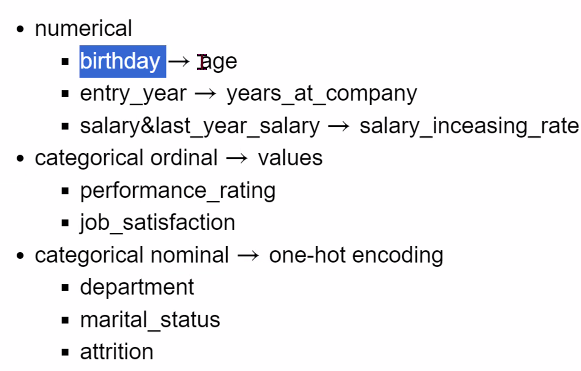

In [16]:
#1 날짜 계산사기
df["birthday"] = pd.to_datetime(df["birthday"], format="%Y-%m-%d")


In [17]:
# df["birthday"].dt.day
# df["birthday"].dt.weekday # 요일
# df["birthday"].dt.month # ETC
df["birthday_year"] = df["birthday"].dt.year

In [18]:
# 항상 다음모델을 위해 고려하면서 코드를 짜야한다. (2021년도면 그이후에 모델을 적용하기 애매해진다.)
# 나이를 피쳐로 추가하기
df["age"] = 2021 - df["birthday_year"] + 1

In [19]:
df.head(2)

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition,birthday_year,age
0,1980-07-20,2013,sales,single,high,very high,8.33,9431500,8923739,8.0,yes,1980,42
1,1972-11-08,2011,rnd,married,very high,medium,6.93,5170672,4617495,2.0,no,1972,50


In [20]:
df["salary_increasing_rate"] = ((df["salary"] - df["last_year_salary"]) / df["last_year_salary"]) * 100

In [21]:
# 2. cat datas 
# 2-1. ordinal
# performance_rating
# job_satisfaction
df["performance_rating"].value_counts()

high         1234
very high     225
Name: performance_rating, dtype: int64

In [22]:
df["job_satisfaction"].value_counts()


very high    458
high         438
low          285
medium       278
Name: job_satisfaction, dtype: int64

In [23]:
level = {"low":0, "medium":1, "high":2,"very high":3}

df["performance_rating"] = df["performance_rating"].replace(level)
df["job_satisfaction"] = df["job_satisfaction"].replace(level)

In [24]:
df

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition,birthday_year,age,salary_increasing_rate
0,1980-07-20,2013,sales,single,2,3,8.33,9431500,8923739,8.0,yes,1980,42,5.690003
1,1972-11-08,2011,rnd,married,3,1,6.93,5170672,4617495,2.0,no,1972,50,11.980024
2,1984-05-07,2014,rnd,single,2,2,9.00,9898200,9176045,6.0,yes,1984,38,7.870003
3,1988-10-19,2013,rnd,married,2,2,8.33,5673500,5362476,1.0,no,1988,34,5.800007
4,1994-07-11,2015,rnd,married,2,1,7.20,3484080,3284389,9.0,no,1994,28,6.080005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1985-02-13,2004,rnd,married,2,3,7.50,3488175,3214315,4.0,no,1985,37,8.520011
1466,1982-05-21,2012,rnd,married,2,0,8.33,4442500,4113806,4.0,no,1982,40,7.990022
1467,1994-02-05,2015,rnd,married,3,1,8.33,8715500,7908802,1.0,no,1994,28,10.200002
1468,1972-04-17,2004,sales,married,2,1,8.67,6804200,6333023,2.0,no,1972,50,7.440001


In [25]:
only_left_OH = df[["age","salary_increasing_rate","department","marital_status","working_hours","job_satisfaction","performance_rating"]]

In [26]:
print(df["department"].unique())
print(df["marital_status"].unique())
print(df["attrition"].unique())

# 범주가 N 개인 노미날 데이터는 N-1 인 벡터로 표현 가능하다
# [1,0,0] 은 [0,0] 으로 된다. 그래도 원핫 인코딩으로 모든카테고리를 표현할 수있다.

['sales' 'rnd' 'hr']
['single' 'married' 'etc']
['yes' 'no']


In [27]:
# 원 핫 인코딩하기 department, marital_status

cat_oh = pd.get_dummies(only_left_OH[["department","marital_status"]],  
                        prefix=["dep","mar"], 
                        prefix_sep="+",  
                        drop_first=True)

df_fin = pd.merge(only_left_OH, cat_oh, left_index=True, right_index=True)

df_fin

,age,salary_increasing_rate,department,marital_status,working_hours,job_satisfaction,performance_rating,dep+rnd,dep+sales,mar+married,mar+single
0,42,5.690003,sales,single,8.33,3,2,0,1,0,1
1,50,11.980024,rnd,married,6.93,1,3,1,0,1,0
2,38,7.870003,rnd,single,9.00,2,2,1,0,0,1
3,34,5.800007,rnd,married,8.33,2,2,1,0,1,0
4,28,6.080005,rnd,married,7.20,1,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1465,37,8.520011,rnd,married,7.50,3,2,1,0,1,0
1466,40,7.990022,rnd,married,8.33,0,2,1,0,1,0
1467,28,10.200002,rnd,married,8.33,1,3,1,0,1,0
1468,50,7.440001,sales,married,8.67,1,2,0,1,1,0


In [28]:
df_fin["attrition"] = pd.get_dummies(df["attrition"], drop_first=True)

In [29]:
df_fin
df.to_csv("../datas/hr_data_prep.csv", encoding = "utf-8")

In [30]:
df_fin.shape

(1459, 12)

## 아래처럼 맞춰야함

![스크린샷 2024-05-22 143009.png](<attachment:스크린샷 2024-05-22 143009.png>)
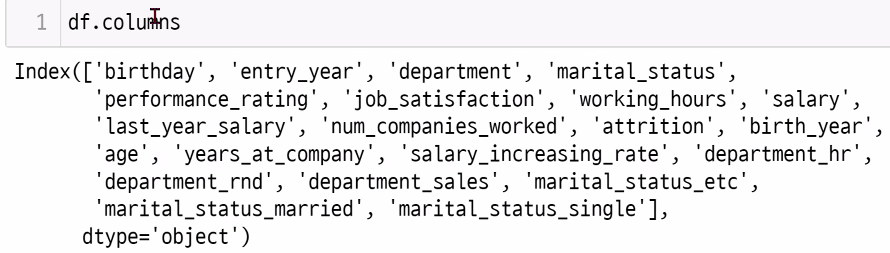

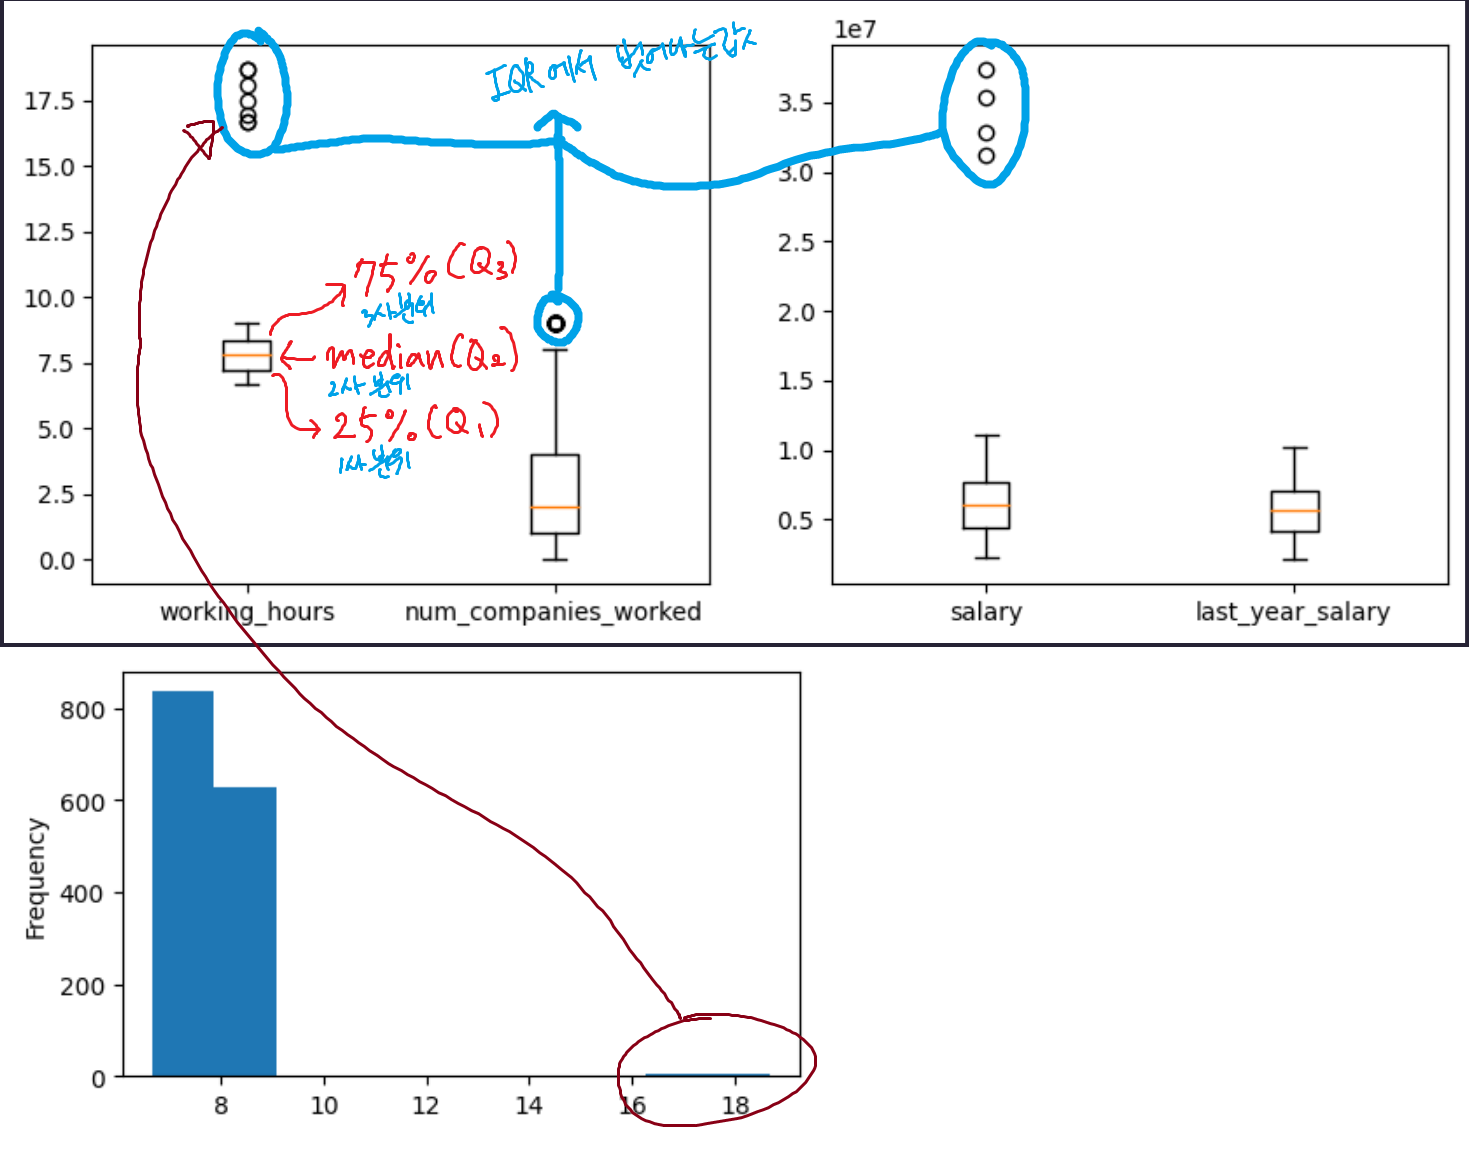